Saving user_reviews.csv to user_reviews (2).csv


<ipython-input-3-017dec2e9eea>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data['Sentiment'], palette='viridis', order=['Positive', 'Neutral', 'Negative'])


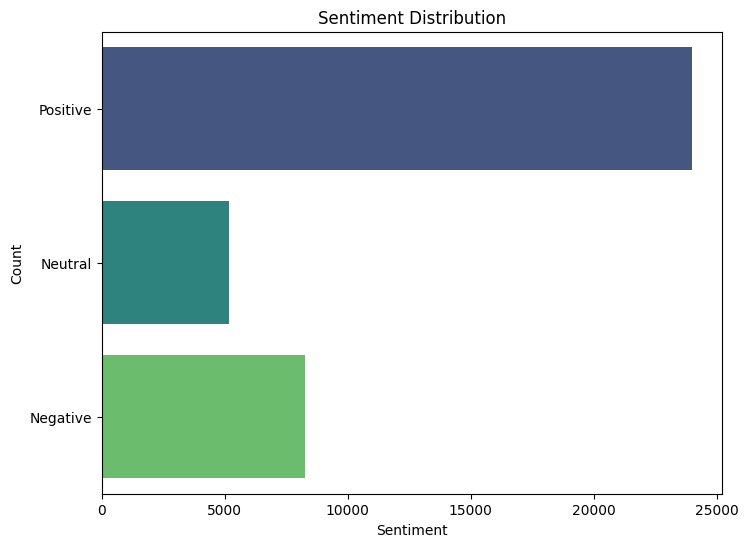

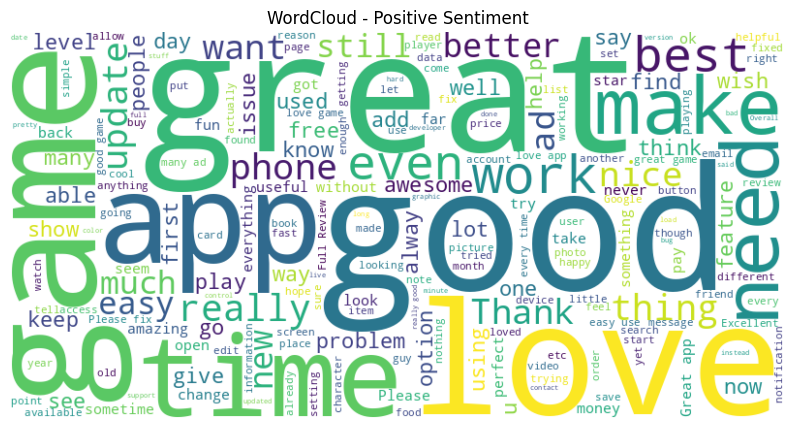

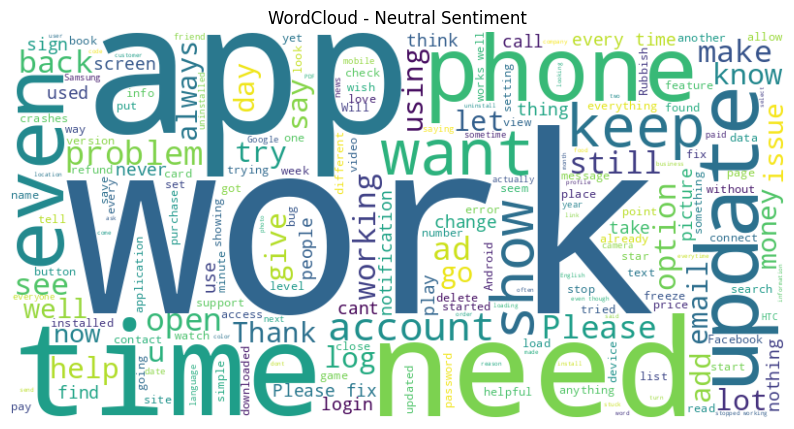

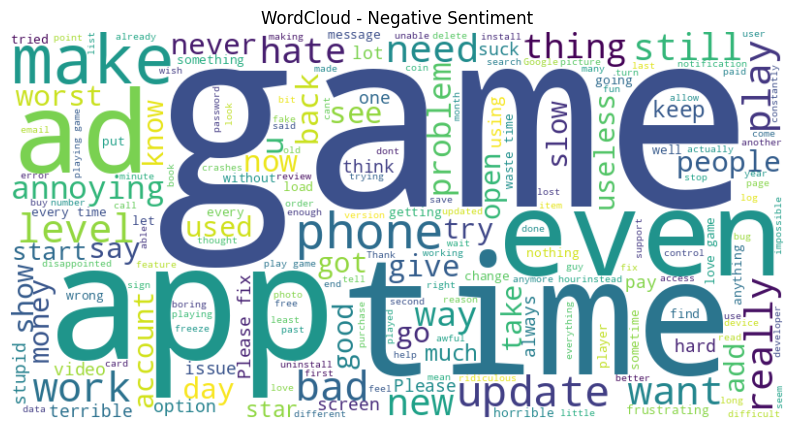

              precision    recall  f1-score   support

    Negative       0.72      0.72      0.72      1654
     Neutral       0.84      0.24      0.37      1032
    Positive       0.81      0.93      0.86      4800

    accuracy                           0.79      7486
   macro avg       0.79      0.63      0.65      7486
weighted avg       0.79      0.79      0.76      7486

[[1190   25  439]
 [ 149  247  636]
 [ 306   23 4471]]
0.7892065188351589


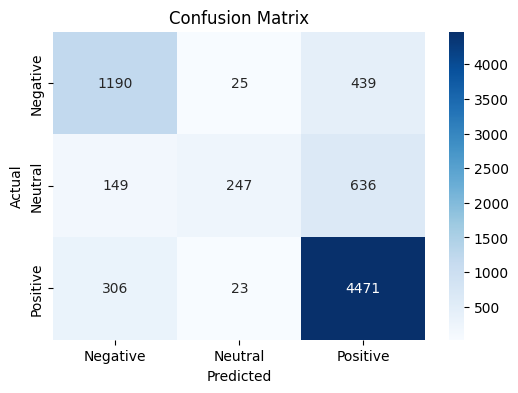

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from google.colab import files

uploaded = files.upload()

data = pd.read_csv('user_reviews.csv')

data = data.dropna(subset=['Translated_Review', 'Sentiment'])

plt.figure(figsize=(8, 6))
sns.countplot(data['Sentiment'], palette='viridis', order=['Positive', 'Neutral', 'Negative'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

for sentiment in ['Positive', 'Neutral', 'Negative']:
    sentiment_text = " ".join(data[data['Sentiment'] == sentiment]['Translated_Review'].values)
    plt.figure(figsize=(10, 6))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(sentiment_text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud - {sentiment} Sentiment')
    plt.show()

X = data['Translated_Review']
y = data['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

model = MultinomialNB()
model.fit(X_train_vec, y_train)

y_pred = model.predict(X_test_vec)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()